In [1]:
import pandas as pd
import numpy as np
np.random.seed(1)

In [2]:
df = pd.read_csv("../Apparel/apparel-trainval.csv")

In [3]:
X = np.asarray(df.drop('label', axis = 1))/255
Y = np.asarray(df['label'])
Y = np.reshape(Y,(Y.shape[0],1))

In [4]:
temp = np.zeros((Y.shape[0],10))
for i in range(Y.shape[0]):
    temp[i,Y[i]] = 1


In [5]:
Y = temp

In [6]:
def traintestvalidatesplit(data):
    x,y = data[0], data[1]
    n = x.shape[0]
    k = int(n*0.8)
    x_train = x[:k]
    y_train = y[:k]
    x_val = x[k:]
    y_val = y[k:]
    return [x_train,y_train],[x_val,y_val]

In [7]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [8]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [9]:
def relu(x):
    return np.where(x > 0, 1.0, 0.0)

In [10]:
def relu_derivative(x):
    return np.where(x > 0, 1.0, 0.0)

In [11]:
def tanh(x):
    return (2/(1+np.exp(-2*x))) - 1

In [12]:
def tanh_derivative(x):
    return 1 - (x * x) 

In [13]:
class NN:
    def __init__(self,layerSizes,activation,learningrate = 0.01):
        self.shape = layerSizes
        self.activation = activation
        self.learningrate = learningrate
        self.activations = {'sigmoid':[sigmoid,sigmoid_derivative],
                           'relu':[relu,relu_derivative],
                           'tanh':[tanh,tanh_derivative]}
        n = len(layerSizes)
        self.layers = []
        self.layers.append(np.ones(self.shape[0]+1))
        for i in range(1,n):
            self.layers.append(np.ones(self.shape[i]))
        self.weights = []
        for i in range(n-1):
            temp = np.zeros((self.layers[i].size,self.layers[i+1].size), dtype = 'd')
            self.weights.append(np.random.randn(*temp.shape))
        self.derivative = [0,]*len(self.weights)

    def forwardpass(self,data):
        self.layers[0][0:-1] = data
        for i in range(1,len(self.shape)):
            self.layers[i][...] = self.activations[self.activation][0](np.dot(self.layers[i-1],self.weights[i-1]))
        return self.layers[-1]


    def backpropogation(self, target, momentum=0.1):
        error = target - self.layers[-1]
        weight_deltas = []
        weight_delta = error*self.activations[self.activation][1](self.layers[-1])
        weight_deltas.append(weight_delta)

        for i in range(len(self.shape)-2,0,-1):
            weight_delta = np.dot(weight_deltas[0],self.weights[i].T)*self.activations[self.activation][1](self.layers[i])
            weight_deltas.insert(0,weight_delta)
            
        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.layers[i])
            weight_delta = np.atleast_2d(weight_deltas[i])
            der = np.dot(layer.T,weight_delta)
            self.weights[i] += self.learningrate*der + momentum*self.derivative[i]
            self.derivative[i] = der

        return (error**2).mean()

In [14]:
def trainMLP(network,samples, epochs=10, momentum=0.1):
    error_set = []
    for i in range(epochs):
        print('Epoch: ', i+1)
        n = samples[0].shape[0]
        error = 0
        for j in range(n):
            out = network.forwardpass(samples[0][j] )
            error += network.backpropogation( samples[1][j], momentum )
        error_set.append(error/n)
        print('Training error',error/n)
    return error_set, error/n

In [15]:
def validateMLP(network,samples):
    n = samples[0].shape[0]
    error = 0
    for j in range(n):
        out = network.forwardpass(samples[0][j] )
        error += network.backpropogation(samples[1][j])
    print('Validation error',error/n)

In [16]:
trainingdata, validationdata = traintestvalidatesplit([X,Y])
sample = [X[:10],Y[:10]]

# Network initialization parameters
- List of no of neuron in each layer where no of items in list is equal to no of layers
- Activation function(ReLu, TanH, Sigmoid)
- Learning rate

# Training Parameters
- network object
- training data
- no. of epochs

In [17]:
nn = NN([X.shape[1],256,64,10],'sigmoid',0.01)
epochs = 17
error_set, finalerror = trainMLP(nn,trainingdata,epochs)

Epoch:  1
Training error 0.047289828027981706
Epoch:  2
Training error 0.03941973535006561
Epoch:  3
Training error 0.0374220854550249
Epoch:  4
Training error 0.036225311675672583
Epoch:  5
Training error 0.035203049026629435
Epoch:  6
Training error 0.034411117116822966
Epoch:  7
Training error 0.03376016283883554
Epoch:  8
Training error 0.03323184724744874
Epoch:  9
Training error 0.03254036537022871
Epoch:  10
Training error 0.026283948264188374
Epoch:  11
Training error 0.025231237388219904
Epoch:  12
Training error 0.024766301143555894
Epoch:  13
Training error 0.02439602081492466
Epoch:  14
Training error 0.024019625311848595
Epoch:  15
Training error 0.023654562643464702
Epoch:  16
Training error 0.02343988765385395
Epoch:  17
Training error 0.02297647697612246


# Validating model

In [23]:
validateMLP(nn,validationdata)

Validation error 0.028999457666210798


# Effect of activation function on validation data

In [24]:
# As a effect of activation functions it has been found that ReLu saturates after few epochs(usually after 2 or 3)
# , whereas TanH found to jumping nerby local minima, which relsulted in jumping inbetween a range of error. 

# However, in case of MLP sigmoid has done a decent job, which resulted in decrease in error after every epoch
# and also error was also low compared to TanH and ReLu,
# but error reduction in sigmoid was slow. 

In [25]:
network = {'layers':[X.shape[1],256,64,10], 'weights':nn.weights,'layerbias':nn.layers, 'activation':'sigmoid'}

# No. of layers vs MSE loss

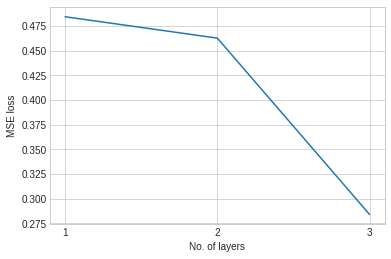

In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

layers = [1,2,3]
loss = [0.4844551378268118,0.4627703481778489,0.28396687375229823]

ax.plot(layers,loss)
plt.xticks([1,2,3])
plt.xlabel('No. of layers')
plt.ylabel('MSE loss')
plt.show()




In [27]:
plt.cla()
plt.clf()
plt.close()

# Epochs vs MSE loss while training

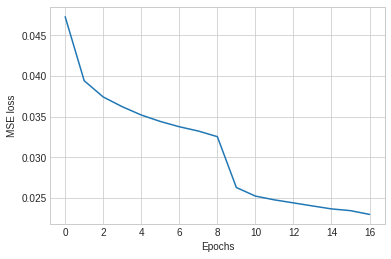

In [28]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = range(0,17)
ax.plot(x,error_set)
plt.xlabel('Epochs')
plt.ylabel('MSE loss')
plt.show()

In [29]:
import pickle
with open(r"network.pickle", "wb") as output_file:
    pickle.dump(network, output_file)